In [1]:
# Task 1: Load the Teaching Rating Dataset
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('teachingratings.csv')
print(df.head())

  minority  age  gender credits    beauty  eval division native tenure  \
0      yes   36  female    more  0.289916   4.3    upper    yes    yes   
1      yes   36  female    more  0.289916   3.7    upper    yes    yes   
2      yes   36  female    more  0.289916   3.6    upper    yes    yes   
3      yes   36  female    more  0.289916   4.4    upper    yes    yes   
4       no   59    male    more -0.737732   4.5    upper    yes    yes   

   students  allstudents  prof  PrimaryLast  vismin  female  single_credit  \
0        24           43     1            0       1       1              0   
1        86          125     1            0       1       1              0   
2        76          125     1            0       1       1              0   
3        77          123     1            1       1       1              0   
4        17           20     2            0       0       0              0   

   upper_division  English_speaker  tenured_prof  
0               1                1 

In [4]:
# Task 2: Does Gender Affect Teaching Evaluation? (Independent Samples t-Test)
# In this section, we will test whether gender affects teaching evaluation ratings (eval).

male_rating_df = df[df['gender'] == 'male']
female_rating_df = df[df['gender'] == 'female']

male_rating_df = df['eval']
female_rating_df = df['eval']

# Assumptions for the independent samples t-test:

# Observations are independent within and across groups.
# Each group is approximately normally distributed.
# Variances are equal across groups (homoscedasticity).

# T2-1: State the Hypotheses

# Please provide your answer in the text cell below. What are the Null Hypothesis (H0) and the Alternative Hypothesis (H1)?
# Null Hypothesis (H0): There is no significant difference in teaching evaluations between male and female instructors.
# Alternative Hypothesis (H1): There is a significant difference in teaching evaluations between male and female instructors.

In [5]:
# T2-2: Split the Dataset by Gender
# Split the dataset into the teachers' ratings from males and females. Store the results in male_rating_df and female_rating_df.

male_rating_df = male_rating_df[df['gender'] == 'male']
female_rating_df = female_rating_df[df['gender'] == 'female']

print(male_rating_df)
print(female_rating_df)

4      4.5
5      4.0
6      2.1
7      3.7
8      3.2
      ... 
450    3.2
451    4.3
458    3.5
460    4.0
461    4.3
Name: eval, Length: 268, dtype: float64
0      4.3
1      3.7
2      3.6
3      4.4
9      4.3
      ... 
455    4.1
456    3.3
457    2.3
459    3.5
462    3.0
Name: eval, Length: 195, dtype: float64


In [6]:
# T2-3: Compute Mean and Standard Deviation
# Compute the mean and the standard deviation of each group. Print the results as shown below.

# Expected outputs
# male 4.06902985163589 0.5566518074142298
# female 3.901025635156876 0.5388025823261163

male_mean = male_rating_df.mean()
male_std = male_rating_df.std()
female_mean = female_rating_df.mean()
female_std = female_rating_df.std()

print(f"male {male_mean} {male_std}")
print(f"female {female_mean} {female_std}")


male 4.06902985163589 0.5566518074142299
female 3.901025635156876 0.5388025823261161


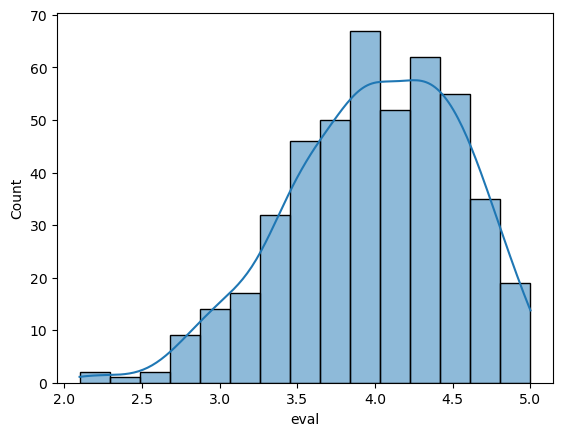

ShapiroResult(statistic=np.float64(0.9775136992205136), pvalue=np.float64(1.4248993103712382e-06))
LeveneResult(statistic=np.float64(0.1194317835514822), pvalue=np.float64(0.7298092272287092))
TtestResult(statistic=np.float64(3.249937943510772), pvalue=np.float64(0.0012387609449522217), df=np.float64(461.0))
MannwhitneyuResult(statistic=np.float64(30911.0), pvalue=np.float64(0.0007567781189068588))


In [ ]:
# T2-4: Test for Normality
# T2-4-1: Visual Inspection
# Please use sns.histplot to visually inspect whether the 'eval' column is normally distributed.
sns.histplot(df['eval'], kde=True)
plt.show()
# Please provide your answer in the text cell below whether the data are normally distributed.
# Answer: The distribution is left-skewed, so the data are not normally distributed.

# T2-4-2: Shapiro-Wilk Test
# Please use scipy.stats.shapiro to test for normality.
shapiro_test = scipy.stats.shapiro(df['eval'])
print(shapiro_test) # ShapiroResult(statistic=np.float64(0.9775136992205136), pvalue=np.float64(1.4248993103712382e-06))

# Please provide your answer in the text cell below whether the data are normally distributed.
# Answer: The p-value is less than 0.05, so we reject the null hypothesis. The data are not normally distributed.

# T2-5: Test for Equal Variances
# Please use scipy.stats.levene to test if the variances of teaching evaluation rates are equal. Specify center based on your conclusion in T2-4-1.
levene_test = scipy.stats.levene(male_rating_df, female_rating_df, center='median')
print(levene_test) # LeveneResult(statistic=np.float64(0.1194317835514822), pvalue=np.float64(0.7298092272287092))
# Hint:
# center='mean' is used when the data are normally distributed.
# center='median' is used when the data are not normally distributed.
# Please provide your answer below whether two samples have the same variances.
# Answer: The p-value is greater than 0.05, so we fail to reject the null hypothesis. The two samples have equal variances.

# T2-6: Perform the Independent Samples t-Test
# Please use scipy.stats.ttest_ind to perform the independent samples t-test. Specify equal_var based on the Levene's test results in T2-5.
t_test = scipy.stats.ttest_ind(male_rating_df, female_rating_df, equal_var=True)
print(t_test) # TtestResult(statistic=np.float64(3.249937943510772), pvalue=np.float64(0.0012387609449522217), df=np.float64(461.0))

# Please provide your answer below whether the gender affects teaching evaluation rating based on the t-test result.
# Answer: The p-value is less than 0.05, so we reject the null hypothesis. The gender affects teaching evaluation rating.

# T2-7: Perform the Mann-Whitney U-Test
# Please use scipy.stats.mannwhitneyu to test whether gender affects teaching evaluation rates.
mann_whitney_test = scipy.stats.mannwhitneyu(male_rating_df, female_rating_df)
print(mann_whitney_test) # MannwhitneyuResult(statistic=np.float64(30911.0), pvalue=np.float64(0.0007567781189068588))

# Please provide your answer below whether the gender affects teaching evaluation rating based on the Mann-Whitney U-Test result.
# Answer: The p-value is less than 0.05, so we reject the null hypothesis. The gender affects teaching evaluation rating.

In [ ]:
# Task 3: Does Teaching Evaluation Differ by Age? (One-way ANOVA)
# In this section, you will use one-way ANOVA to determine if teaching evaluation scores differ by age group.

# Assumptions for one-way ANOVA:

# Observations are independent.
# Each group is normally distributed.
# Variances are equal across groups.
# In this task, we will assume that the data in each age group are normally distributed. Thus the only test left before we can run the one-way ANOVA is the test for the equality of variances.

# T3-1: Split the Dataset by Age Group
# Split the dataset into three age groups: young, mid, and old. Store the results in young_rating_df, mid_rating_df, and old_rating_df.

# young_rating_df = df.loc[(df['age'] <= 40), 'eval']
# mid_rating_df = df.loc[(df['age'] > 40) & (df['age'] < 57), 'eval']
# old_rating_df = df.loc[(df['age'] >= 57), 'eval']

young_rating_df = df['eval'][df['age'] <= 40]
mid_rating_df = df['eval'][(df['age'] > 40) & (df['age'] < 57)]
old_rating_df = df['eval'][df['age'] >= 57]
print(young_rating_df)
print(mid_rating_df)
print(old_rating_df)

# T3-2: Compute Mean and Standard Deviation for Each Group
# Compute the mean and the standard deviation of each group. Print the results as shown below.

# # Expected outputs
# # young 4.002654871054455 0.5057632493708224
# # mid 4.030701748111792 0.5379234358312474
# # old 3.9336065581587496 0.6242497286958886

young_mean = young_rating_df.mean()
young_std = young_rating_df.std()
mid_mean = mid_rating_df.mean()
mid_std = mid_rating_df.std()
old_mean = old_rating_df.mean()
old_std = old_rating_df.std()

print(f"young {young_mean} {young_std}")
print(f"mid {mid_mean} {mid_std}")
print(f"old {old_mean} {old_std}")

# T3-3: Test for Equal Variances
# Please use scipy.stats.levene to test for equality of variances among the three age groups. Use center='mean' as we assume normality.

# Hint: As scipy.stats.levene support more than two sets of samples, so you can run the test on three groups in one go.

# Please provide your answer below whether the variances are the same or different.
levene_test_age = scipy.stats.levene(young_rating_df, mid_rating_df, old_rating_df, center='mean')
print(levene_test_age) # LeveneResult(statistic=np.float64(3.820237661494229), pvalue=np.float64(0.02262141852021939))
# Answer: The p-value is less than 0.05, so we reject the null hypothesis. The variances are different.

# T3-4: Perform One-way ANOVA
# Regardless of whether the assumption on the same variances hold from the task T3-3, please Use scipy.stats.f_oneway to perform one-way ANOVA.
anova_test = scipy.stats.f_oneway(young_rating_df, mid_rating_df, old_rating_df)
print(anova_test) # F_onewayResult(statistic=np.float64(1.2226327996572206), pvalue=np.float64(0.29540894225417536))
# Please provide your answer below whether the teaching evaluation rating differs by age group.
# Answer: The p-value is greater than 0.05, so we fail to reject the null hypothesis. The teaching evaluation rating does not differ by age group.

0      4.3
1      3.7
2      3.6
3      4.4
9      4.3
      ... 
450    3.2
451    4.3
456    3.3
458    3.5
461    4.3
Name: eval, Length: 113, dtype: float64
7      3.7
8      3.2
35     3.4
36     4.5
37     4.5
      ... 
454    3.2
455    4.1
457    2.3
460    4.0
462    3.0
Name: eval, Length: 228, dtype: float64
4      4.5
5      4.0
6      2.1
23     4.2
24     4.4
      ... 
442    3.6
443    4.2
444    3.4
445    4.0
459    3.5
Name: eval, Length: 122, dtype: float64
young 4.002654871054455 0.5057632493708225
mid 4.030701748111792 0.5379234358312474
old 3.9336065581587496 0.6242497286958887
LeveneResult(statistic=np.float64(3.820237661494229), pvalue=np.float64(0.02262141852021939))
F_onewayResult(statistic=np.float64(1.2226327996572206), pvalue=np.float64(0.29540894225417536))
